In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

Import dataset from Kaggle

In [4]:
data = pd.read_csv('/content/drive/MyDrive/code/kaggle/spaceship_titanic/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/code/kaggle/spaceship_titanic/test.csv')

# EDA

Shape of the dataset

In [5]:
data.shape

(8693, 14)

First look in to the dataset - first and last 5 rows

In [6]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


Basic info and statistics

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Check null values

In [10]:
missing_table = pd.DataFrame({
    'Missing Values': data.isna().sum(),
    'Percentage (%)': (data.isnull().mean() * 100).round(2)
})

print(missing_table.sort_values(by='Missing Values', ascending=False))

              Missing Values  Percentage (%)
CryoSleep                217            2.50
ShoppingMall             208            2.39
VIP                      203            2.34
HomePlanet               201            2.31
Name                     200            2.30
Cabin                    199            2.29
VRDeck                   188            2.16
Spa                      183            2.11
FoodCourt                183            2.11
Destination              182            2.09
RoomService              181            2.08
Age                      179            2.06
PassengerId                0            0.00
Transported                0            0.00


Unique values

In [11]:
data.nunique()

,0
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115


Check dataset balance

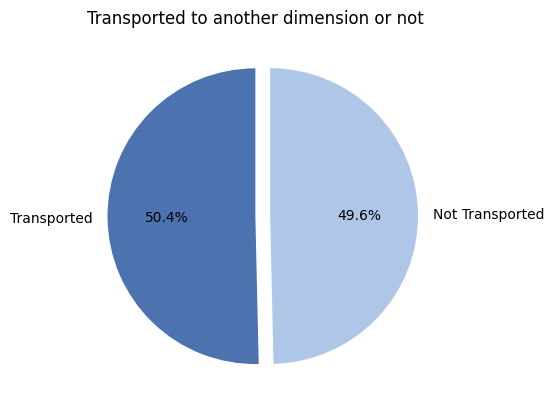

In [12]:
data['Transported'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Transported', 'Not Transported'], startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Transported to another dimension or not')
plt.ylabel('')
plt.show()

# Data visualisations

Visualizations of numerical features

<Axes: xlabel='Age', ylabel='Count'>

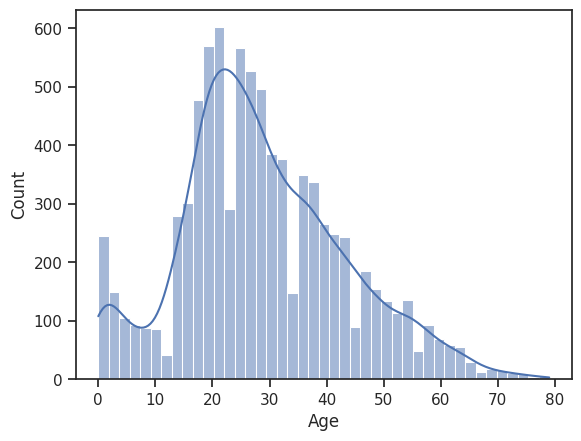

In [13]:
sns.set_theme(style="ticks")
sns.histplot(data=data, x="Age", kde=True)

<Axes: xlabel='RoomService', ylabel='Count'>

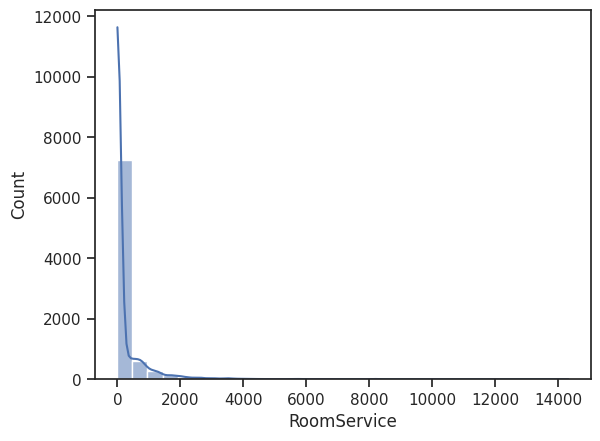

In [14]:
sns.histplot(data=data, x="RoomService", kde=True, bins=30)

<Axes: xlabel='FoodCourt', ylabel='Count'>

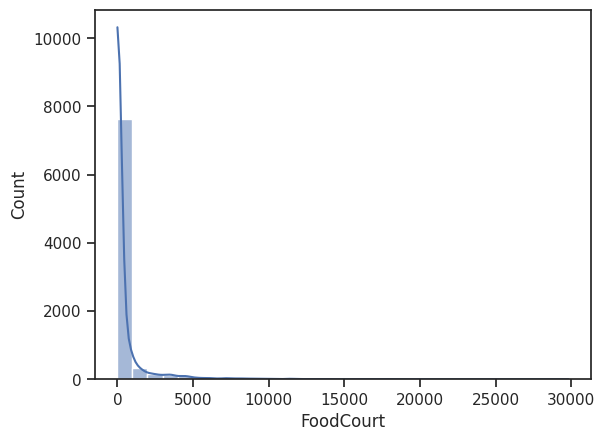

In [15]:
sns.histplot(data=data, x="FoodCourt", kde=True, bins=30)

<Axes: xlabel='ShoppingMall', ylabel='Count'>

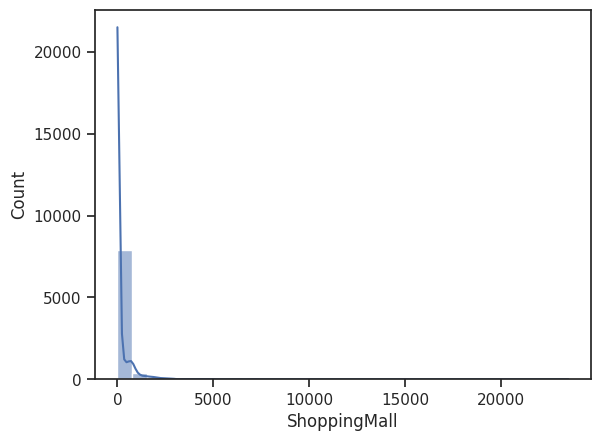

In [16]:
sns.histplot(data=data, x="ShoppingMall", kde=True, bins=30)

<Axes: xlabel='Spa', ylabel='Count'>

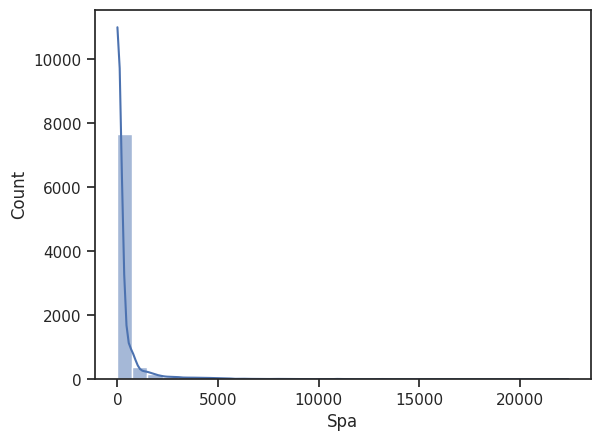

In [17]:
sns.histplot(data=data, x="Spa", kde=True, bins=30)

<Axes: xlabel='VRDeck', ylabel='Count'>

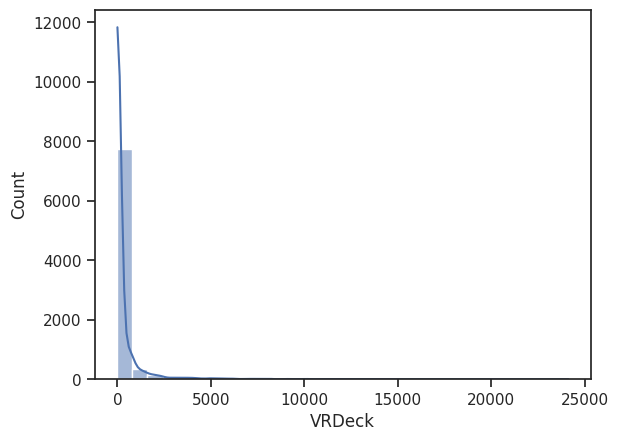

In [18]:
sns.histplot(data=data, x="VRDeck", kde=True, bins=30)

Box Plots of Numerical Features: Visualizing Outliers

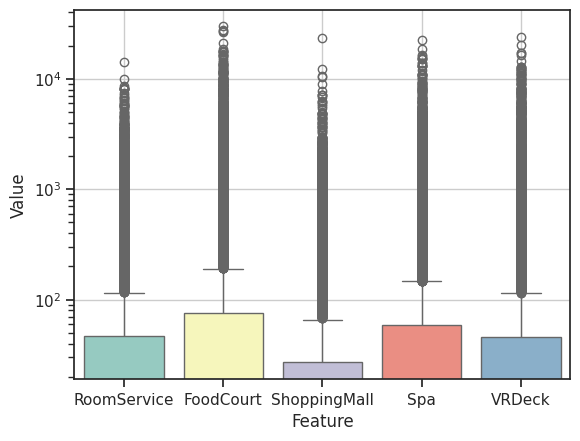

In [19]:
df_melted = data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] .melt(var_name='Feature', value_name='Value')

sns.boxplot(data=df_melted, x='Feature', y='Value', palette="Set3")
plt.yscale('log')
plt.grid(True)
plt.show()

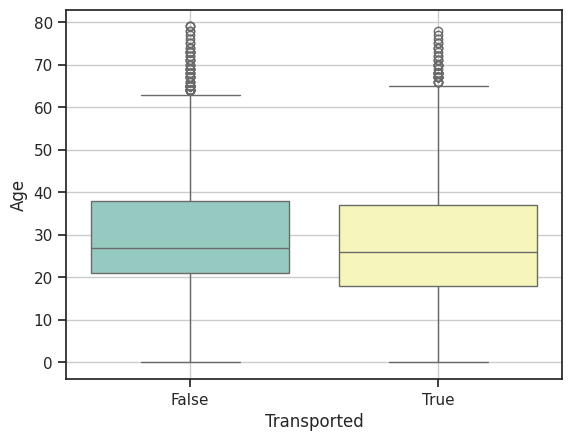

In [20]:
sns.boxplot(data=data, x="Transported", y="Age", palette="Set3")

plt.grid(True)
plt.show()

Visualizations of categorical features

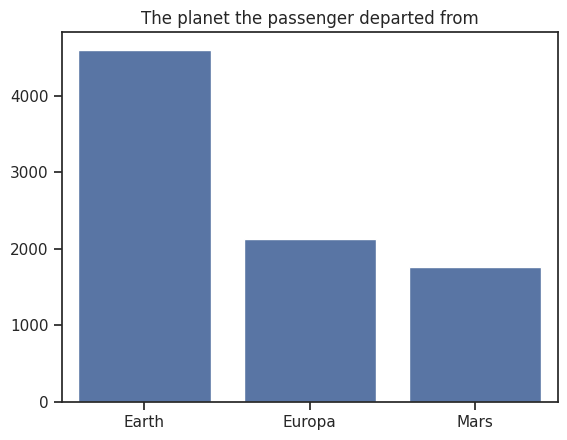

In [21]:
sns.countplot(data=data, x=data['HomePlanet'], order=data['HomePlanet'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('The planet the passenger departed from')
plt.show()

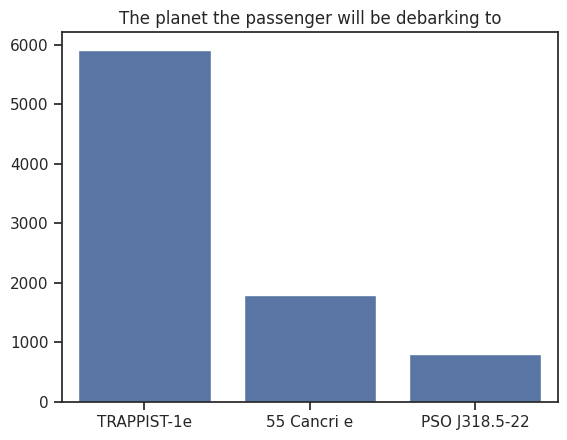

In [22]:
sns.countplot(data=data, x=data['Destination'], order=data['Destination'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('The planet the passenger will be debarking to')
plt.show()

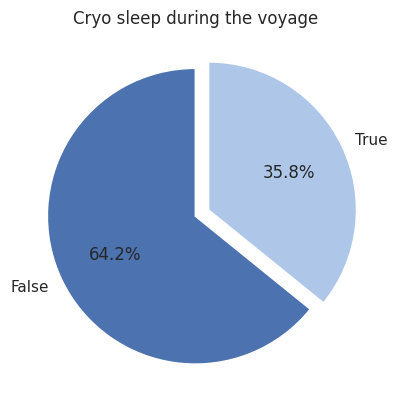

In [23]:
data['CryoSleep'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Cryo sleep during the voyage')
plt.ylabel('')
plt.show()

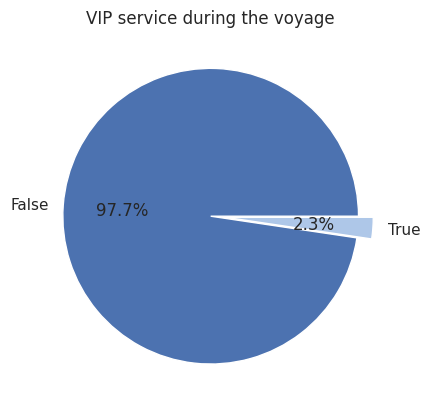

In [24]:
data['VIP'].value_counts().plot.pie(autopct='%1.1f%%', startangle=0, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('VIP service during the voyage')
plt.ylabel('')
plt.show()

Pairplots for investigate relationships

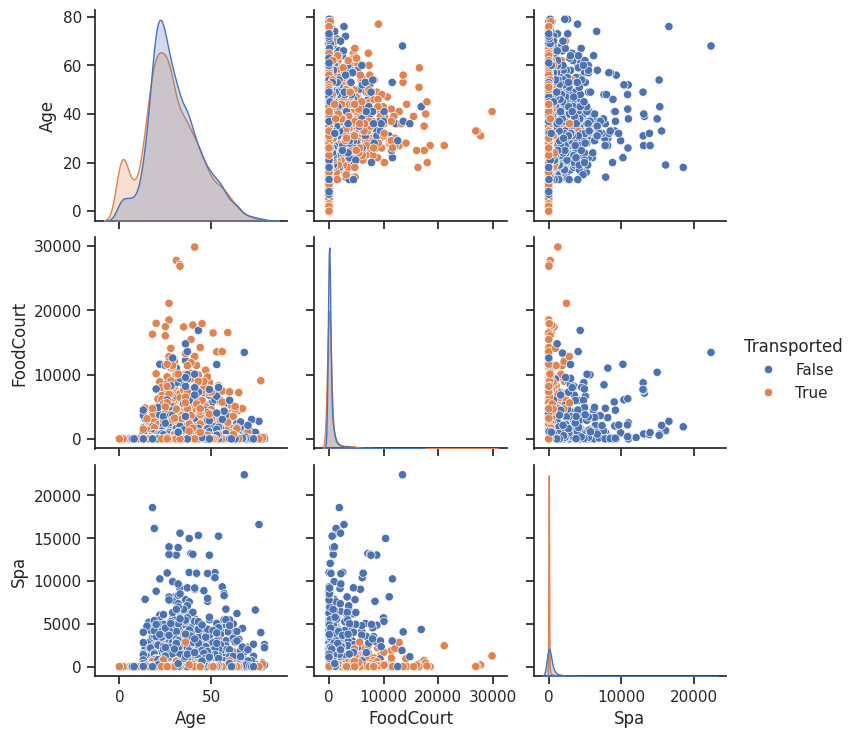

In [25]:
sns.pairplot(data, vars=['Age', 'FoodCourt', 'Spa'], hue='Transported')

Correlation matrix

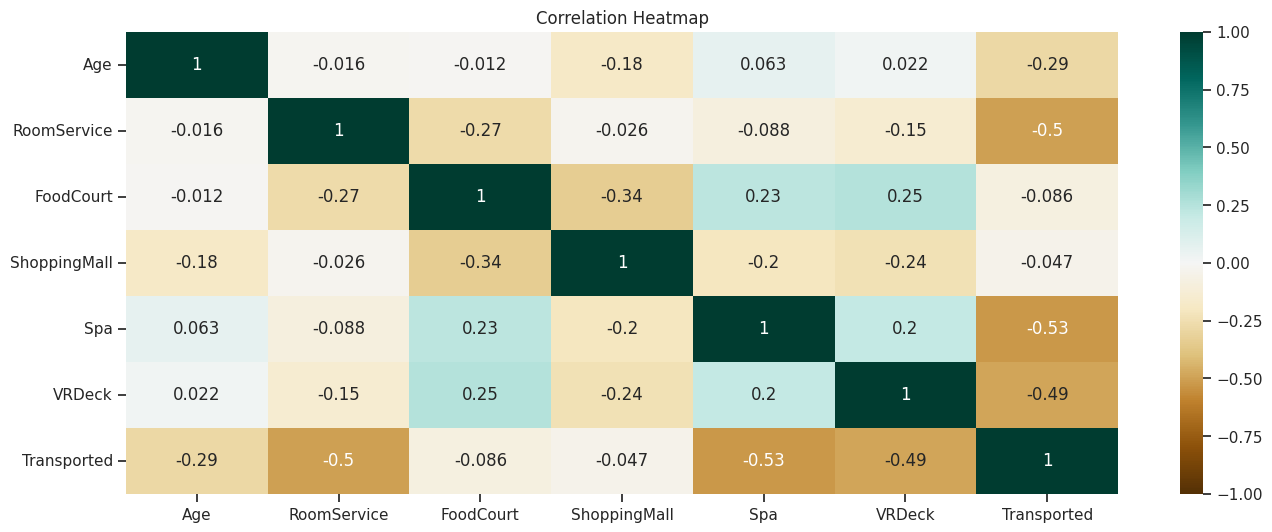

In [26]:
plt.figure(figsize=(16, 6))

data_corr = data.corr(numeric_only=True)

heatmap = sns.heatmap(data_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

plt.show()

Grouped Statistics

In [27]:
data.groupby('Transported')['Spa'].agg(['mean', 'count']).sort_values('mean')

,mean,count
Transported,,
True,61.675531,4287
False,564.382666,4223


# Data preprocessing

In [28]:
! pip install optuna
! pip install optuna-integration[sklearn]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 4.2 MB/s eta 0:00:00


In [29]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.utils import shuffle

In [30]:
X = data.drop('Transported', axis=1)
y = data['Transported']

Feature engineering


*   Split cabin feature
*   Calculate total expenses
*   New feature is family
*   Grouped by age to age groups
*   Extract group from passenger ID
*   Calculate group size
*   Add feature is alone
*   Drop some features



In [31]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
      pass

    def fit(self, X, y = None):
      return self

    def transform(self, X):
      # Split cabin
      X[['Deck', 'CabinNum', 'Side']] = X['Cabin'].str.split('/', expand=True)
      X['CabinNum'] = pd.to_numeric(X['CabinNum'], errors='coerce')

      # Total expense
      expense_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
      X[expense_cols] = X[expense_cols].fillna(0)
      X['TotalExpenses'] = X[expense_cols].sum(axis=1)
      X.loc[X['CryoSleep'] == True, 'TotalExpenses'] = 0

      # Is family column
      X['LastName'] = X['Name'].str.split().str[-1]
      X['IsFamily'] = X.groupby('LastName')['Name'].transform('size') > 1
      X['IsFamily'] = X['IsFamily'].astype(int)

      # Grouped by age
      X['AgeGroup'] = pd.cut(X['Age'], bins=[0, 18, 30, 50, 80], labels=['Child', 'YoungAdult', 'Adult', 'Senior'])

      # Group from passenger ID and group size
      X['Group'] = X['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
      X['GroupSize'] = X.groupby('Group')['Group'].transform('count')
      X['IsAlone'] = X['GroupSize'] == 1

      # Drop columns
      X = X.drop(columns=['Name', 'LastName', 'PassengerId', 'Cabin', 'ShoppingMall', 'Age'])

      return X

Categorical and numerical pipelines

In [32]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

In [33]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


Preprocessor with numerical and categorical part for the final pipeline

In [34]:
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, make_column_selector(dtype_include=['int64', 'float64'])),
    ('cat', categorical_pipeline, make_column_selector(dtype_include=['object']))
])

Split the data

In [35]:
X, y = shuffle(X, y, random_state=42)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model building

In [37]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [38]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_validate, StratifiedKFold
from optuna.distributions import IntDistribution, FloatDistribution, CategoricalDistribution
from sklearn.feature_selection import SelectFromModel

XGBoost

In [39]:
param_distributions = {
    'classifier__n_estimators': IntDistribution(300, 1000),
    'classifier__max_depth': IntDistribution(3, 15),
    'classifier__learning_rate': FloatDistribution(0.005, 0.5),
    'classifier__subsample': FloatDistribution(0.1, 1.0),
    'classifier__colsample_bytree': FloatDistribution(0.3, 1.0),
    'classifier__gamma': FloatDistribution(0.01, 2.0),
    'classifier__min_child_weight': IntDistribution(1, 10),
    'classifier__reg_alpha': FloatDistribution(1.0, 2.0),
    'classifier__reg_lambda': FloatDistribution(1.0, 5.0),
}

In [40]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [41]:
xgboost_pipeline = Pipeline([
    ('feature_engineering', FeatureEngineer()),
    ('preprocessing', preprocessor),
    ('feature_selection', SelectFromModel(estimator=xgb, threshold="median")),
    ('classifier', xgb)
])

In [42]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [43]:
optuna_search = OptunaSearchCV(
    xgboost_pipeline,
    param_distributions=param_distributions,
    cv=cv,
    n_jobs=-1,
    scoring='accuracy',
    n_trials=100,
    random_state=42
)

In [44]:
optuna_search.fit(X_train, y_train)

[I 2025-05-31 21:07:02,781] A new study created in memory with name: no-name-3a7eff8c-36d5-4bba-a187-cfa97cede91b
[I 2025-05-31 21:07:21,560] Trial 1 finished with value: 0.8054426114280989 and parameters: {'classifier__n_estimators': 893, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.3595397001729581, 'classifier__subsample': 0.8588657195126883, 'classifier__colsample_bytree': 0.38821223430947055, 'classifier__gamma': 1.574448858675667, 'classifier__min_child_weight': 5, 'classifier__reg_alpha': 1.4740409804667358, 'classifier__reg_lambda': 3.016920217859705}. Best is trial 1 with value: 0.8054426114280989.
[I 2025-05-31 21:07:31,524] Trial 0 finished with value: 0.7994048209708097 and parameters: {'classifier__n_estimators': 820, 'classifier__max_depth': 11, 'classifier__learning_rate': 0.27228854811823716, 'classifier__subsample': 0.5408818903367166, 'classifier__colsample_bytree': 0.6253009050645079, 'classifier__gamma': 0.524342301882234, 'classifier__min_child_weight

OptunaSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
               estimator=Pipeline(steps=[('feature_engineering',
                                          FeatureEngineer()),
                                         ('preprocessing',
                                          ColumnTransformer(transformers=[('num',
                                                                           Pipeline(steps=[('imputer',
                                                                                            SimpleImputer())]),
                                                                           <sklearn.compose._column_transformer.make_column_selector object at 0x7aa58475b510>),
                                                                          ('cat',
                                                                           Pipeline(steps=...
                                    'classifier__n_estimators': IntDistribution(high=1000, log=False, low=300, step=1),
                                    'classifier__reg_alpha': FloatDistribution(high=2.0, log=False, low=1.0, step=None),
                                    'classifier__reg_lambda': FloatDistribution(high=5.0, log=False, low=1.0, step=None),
                                    'classifier__subsample': FloatDistribution(high=1.0, log=False, low=0.1, step=None)},
               random_state=42, scoring='accuracy')

In [45]:
print(f"XGBoost: {optuna_search.best_params_}")
print("Best score:", optuna_search.best_score_)

XGBoost: {'classifier__n_estimators': 586, 'classifier__max_depth': 10, 'classifier__learning_rate': 0.29624088738596877, 'classifier__subsample': 0.8924338605291153, 'classifier__colsample_bytree': 0.3937899504142742, 'classifier__gamma': 1.093147111953602, 'classifier__min_child_weight': 3, 'classifier__reg_alpha': 1.331113420663884, 'classifier__reg_lambda': 1.5141505935441641}
Best score: 0.8109067228975441


In [46]:
best_boost = optuna_search.best_estimator_

LightGBM

In [47]:
from lightgbm import LGBMClassifier

In [48]:
lgb = LGBMClassifier(random_state=42)

In [49]:
lightgbm_pipeline = Pipeline([
    ('feature_engineering', FeatureEngineer()),
    ('preprocessing', preprocessor),
    ('feature_selection', SelectFromModel(estimator=lgb, threshold="median")),
    ('classifier', lgb)
])

In [50]:
param_distributions_lgb = {
    'classifier__n_estimators': IntDistribution(100, 1000),
    'classifier__max_depth': IntDistribution(5, 30),
    'classifier__learning_rate': FloatDistribution(0.001, 0.2, log=True),
    'classifier__subsample': FloatDistribution(0.4, 1.0),
    'classifier__colsample_bytree': FloatDistribution(0.3, 1.0),
    'classifier__min_child_samples': IntDistribution(5, 60),
}

In [51]:
optuna_search_lgb = OptunaSearchCV(
    lightgbm_pipeline,
    param_distributions=param_distributions_lgb,
    cv=cv,
    scoring='accuracy',
    n_trials=100,
    random_state=42,
    n_jobs=-1
)

In [52]:
optuna_search_lgb.fit(X_train, y_train)

[I 2025-05-31 21:20:43,231] A new study created in memory with name: no-name-e59a8d02-427d-4433-b7a2-71c874e7d89c
[I 2025-05-31 21:20:52,590] Trial 1 finished with value: 0.805585669395518 and parameters: {'classifier__n_estimators': 192, 'classifier__max_depth': 28, 'classifier__learning_rate': 0.052153893184488896, 'classifier__subsample': 0.9991670844868005, 'classifier__colsample_bytree': 0.5661090892688367, 'classifier__min_child_samples': 59}. Best is trial 1 with value: 0.805585669395518.
[I 2025-05-31 21:21:02,887] Trial 0 finished with value: 0.7946580666501282 and parameters: {'classifier__n_estimators': 622, 'classifier__max_depth': 21, 'classifier__learning_rate': 0.10008917888165492, 'classifier__subsample': 0.6378645049772772, 'classifier__colsample_bytree': 0.6871005783685449, 'classifier__min_child_samples': 10}. Best is trial 1 with value: 0.805585669395518.
[I 2025-05-31 21:21:03,985] Trial 2 finished with value: 0.8067377821880427 and parameters: {'classifier__n_esti

[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1834
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1808
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 15
[LightGBM] [Info] [binary:

OptunaSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
               estimator=Pipeline(steps=[('feature_engineering',
                                          FeatureEngineer()),
                                         ('preprocessing',
                                          ColumnTransformer(transformers=[('num',
                                                                           Pipeline(steps=[('imputer',
                                                                                            SimpleImputer())]),
                                                                           <sklearn.compose._column_transformer.make_column_selector object at 0x7aa58475b510>),
                                                                          ('cat',
                                                                           Pipeline(steps=...
                                    'classifier__learning_rate': FloatDistribution(high=0.2, log=True, low=0.001, step=None),
                                    'classifier__max_depth': IntDistribution(high=30, log=False, low=5, step=1),
                                    'classifier__min_child_samples': IntDistribution(high=60, log=False, low=5, step=1),
                                    'classifier__n_estimators': IntDistribution(high=1000, log=False, low=100, step=1),
                                    'classifier__subsample': FloatDistribution(high=1.0, log=False, low=0.4, step=None)},
               random_state=42, scoring='accuracy')

In [54]:
print(f"LightGBM: {optuna_search_lgb.best_params_}")
print("Best score:", optuna_search_lgb.best_score_)

LightGBM: {'classifier__n_estimators': 437, 'classifier__max_depth': 22, 'classifier__learning_rate': 0.015951750177667617, 'classifier__subsample': 0.6902544961409504, 'classifier__colsample_bytree': 0.9606357003796707, 'classifier__min_child_samples': 7}
Best score: 0.8099001488464402


In [55]:
best_lgb = optuna_search_lgb.best_estimator_

Linear SVC

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import LinearSVC

New pipeline for numerical data - need of scale numerical data

In [57]:
numerical_pipeline_scale = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [58]:
preprocessor_svc = ColumnTransformer([
    ('num', numerical_pipeline_scale, make_column_selector(dtype_include=['int64', 'float64'])),
    ('cat', categorical_pipeline, make_column_selector(dtype_include=['object']))
])

In [59]:
svc = LinearSVC(C=1, max_iter=10000, random_state=42,  class_weight='balanced', penalty='l2')

In [60]:
svc_pipeline = Pipeline([
    ('feature_engineering', FeatureEngineer()),
    ('preprocessing', preprocessor_svc),
    ('feature_selection', SelectFromModel(estimator=svc, threshold="median")),
    ('classifier', svc)
])

Stack models using Logistics regression

In [61]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegressionCV

In [62]:
meta_model = LogisticRegressionCV(
    Cs=8,
    cv=cv,
    penalty='elasticnet',
    l1_ratios=[0.0, 0.25, 0.5, 0.75, 1.0],
    solver='saga',
    max_iter=4000,
    scoring='accuracy',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)


stacked_model = StackingClassifier(
    estimators=[
        ('xgb', best_boost),
        ('lgb', best_lgb),
        ('svc', svc_pipeline)
    ],
    final_estimator=meta_model,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    stack_method='auto',
    n_jobs=-1
)

In [63]:
stacked_model.fit(X_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimators=[('xgb',
                                Pipeline(steps=[('feature_engineering',
                                                 FeatureEngineer()),
                                                ('preprocessing',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer())]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7aa587c9cf10>),
                                                                                 ('cat',
                                                                                  Pi...
                                                ('classifier',
                                                 LinearSVC(C=1,
                                                           class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]))],
                   final_estimator=LogisticRegressionCV(Cs=8,
                                                        class_weight='balanced',
                                                        cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                                                        l1_ratios=[0.0, 0.25,
                                                                   0.5, 0.75,
                                                                   1.0],
                                                        max_iter=4000,
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        random_state=42,
                                                        scoring='accuracy',
                                                        solver='saga'),
                   n_jobs=-1)

Predicted values

In [64]:
y_pred_stack = stacked_model.predict(X_test)

Model evaluation

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay, roc_auc_score

Accuracy of the final stack model

In [66]:
acc = accuracy_score(y_test,y_pred_stack)
print("Accuracy for test set {} %".format(acc*100))

Accuracy for test set 80.33352501437608 %


# Submition

In [67]:
test_ids = test_data['PassengerId']

In [68]:
y_pred_test = stacked_model.predict(test_data)

In [69]:
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Transported': y_pred_test.astype(bool)
})

In [70]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [71]:
submission.to_csv('submission.csv', index=False)